# 网络生成

## 通用库引入

In [63]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

N = 30
direct_flag = True

## 设置随机种子

In [ ]:
import numpy as np
rand_seed = 40

# Set the random seed for reproducibility
np.random.seed(rand_seed)

## 生成E-R网络

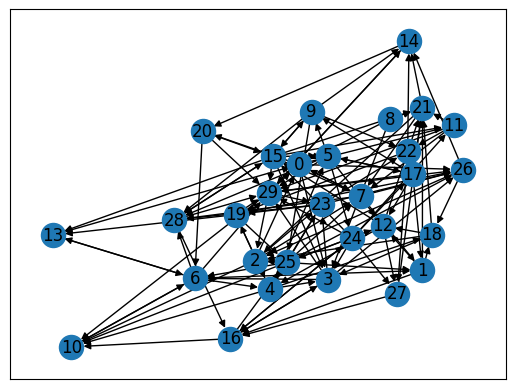

In [86]:
m = 2  # number of edges to attach from a new node to existing nodes
G = nx.erdos_renyi_graph(N, (2-(direct_flag != True)) *
                         m/N, directed=direct_flag, seed=rand_seed)
fig = plt.figure(1)
layout = nx.spring_layout(G)
nx.draw_networkx(G, pos=layout)
plt.show('graph_ER.png')

In [87]:
# graph metrics
print(G.is_directed())

True


# domirank指标生成

## 计算sigma值

In [95]:
import drank as dr
GAdj = nx.to_scipy_sparse_array(G)
lambN = dr.find_eigenvaluen(GAdj, maxIter=500, dt=0.01, checkStep=25)
sigma, sigmaArray = dr.optimal_sigman(GAdj, endVal=lambN)

Current Interval : [-9.0, -1.0]
Current Interval : [-9.0, -1.2857142857142856]
Current Interval : [-9.0, -1.6363636363636362]
Current Interval : [-2.7692307692307687, -1.6363636363636362]
Current Interval : [-2.7692307692307687, -1.8227848101265822]
Current Interval : [-2.7692307692307687, -1.9930795847750864]
Current Interval : [-2.3179074446680077, -1.9930795847750864]
Current Interval : [-2.3179074446680077, -2.0654415060510978]
Current Interval : [-2.3179074446680077, -2.123257689206312]
Current Interval : [-2.3179074446680077, -2.1687895278717457]
Current Interval : [-2.3179074446680077, -2.20424087956769]
Current Interval : [-2.2596456278134274, -2.20424087956769]
Current Interval : [-2.2596456278134274, -2.2178357804176225]
Current Interval : [-2.2596456278134274, -2.228142518065971]
Current Interval : [-2.2596456278134274, -2.235935656679567]
Current Interval : [-2.2596456278134274, -2.241816379855753]
Current Interval : [-2.2596456278134274, -2.246247262615251]
Current Interva

## 递归算法

In [98]:
flag, ourDomiRankDistribution = dr.domirank_by_recursive(
    GAdj, sigma=sigma)

if flag:
    print(ourDomiRankDistribution)
else:
    print("Can not find recursive algorithm solve of Dominance rank distribution.")


[ 3.022537   -0.02755575  0.2580401  -0.7785941   0.6103932   1.8430464
  3.1719954   0.802065    0.19243042  0.37906113 -0.896358    1.0104692
  0.21524122 -0.896358    1.2377765   2.8173654   1.9046209   1.1973584
  1.6571844   1.6956894  -1.3983883   0.28977078  0.06057512  1.4740694
  0.21869092  0.8411221  -0.06313195 -0.08021497 -0.87535024  0.3991128 ]


## 解析算法

In [97]:
analyticalDomiRankDistribution = dr.domirank_by_annalytical(
    GAdj, sigma=sigma)
print(analyticalDomiRankDistribution)

[ 3.02284731 -0.0277867   0.25798334 -0.77890872  0.61037106  1.84315041
  3.17243641  0.80219409  0.19248035  0.37912207 -0.89655681  1.01056614
  0.21531416 -0.89655681  1.23793985  2.8176161   1.90498398  1.19744482
  1.65736699  1.69596509 -1.3986586   0.28966451  0.06042941  1.47418569
  0.21856714  0.84095382 -0.06326231 -0.08033074 -0.87558547  0.39902091]


# 网络可视化过程
1. 节点攻击对比
2. 网络绘制

## 节点攻击对比

In [ ]:
# generate the attack using the centrality (descending)
ourDomiRankAttack = dr.generate_attack(ourDomiRankDistribution)
# attack the network and get the largest connected component evolution
domiRankRobustness, domiRankLinks = dr.network_attack_sampled(
    GAdj, ourDomiRankAttack)

# generating the plot
fig2 = plt.figure(2)
ourRangeNew = np.linspace(0, 1, domiRankRobustness.shape[0])
plt.plot(ourRangeNew, domiRankRobustness, label='Recursive DR')
plt.plot(ourRangeNew, domiRankLinks, label='Recursive DR Links')
plt.legend()
plt.xlabel('fraction of nodes removed')
plt.ylabel('largest connected component')
plt.show()

## 寻找sigma过程